# EXPLORING GENDER PAY GAPS IN THE UNITED STATES

### INTRODUCTION

Even though the gender pay gap between male and female professionals has reduced considerably from the early 1980s, it remains an issue. In the past two decades, women earned an average of 80% of what men earned (Kochhar, 2023) and this gap has remained relatively consistent. As a result, we are interested in investigating gender pay gaps in relation to profession. The big inferential question to be answered is therefore, “are women underrepresented in higher-paying occupations relative to their share of the workforce?” 

### METHODOLOGY

In order to answer this question, the “Census Income” data from the UCI Machine Learning Repository was chosen, which contains various education levels, job position and salary statistics from the 1994 Census database (Kohavi & Becker, 1994). Moreover, we have set up the following hypothesis:  

Our Null Hypothesis ($H_0$) is: women is underrepresented in lower paying occupations.

Our Alternative Hypothesis ($H_A$) is: women is not underrepresented in lower paying occupations.

### PRELIMINARY EXPLORATORY DATA ANALYSIS

In [2]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
colnames<- c("age", "work_class", "fnlwgt", "education_level", "year_of_education","marital_status", 
             "occupation", "relationship_status", "race","gender","capital_gain", "capital_loss", 
             "working_hours(/wk)", "native_country", "income")

income_data_main <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                        col_names = colnames)

head(income_data_main)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): work_class, education_level, marital_status, occupation, relationsh...
dbl (6): age, fnlwgt, year_of_education, capital_gain, capital_loss, working...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,work_class,fnlwgt,education_level,year_of_education,marital_status,occupation,relationship_status,race,gender,capital_gain,capital_loss,working_hours(/wk),native_country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**TABLE 1 - Raw dataset**

We begin by filtering the variable 'native_country' to contain just the United States as we are interested in investigating its gender pay gaps. The reason behind this is, other countries in the dataset were at different stages of economic development at the time this survey was conducted, therefore other external factors besides from gender can also affect earning differeces. As a result, we want to minimize these by exploring the gender pay gap only in the US. Moreover, because the level of education does contribute to differences in salary, we want to isolate this factor and further compare the wage differences between male and female white collar professionals based on their respective education levels.

In [11]:
income_data <- income_data_main |>
            filter(native_country == "United-States") |>
            select(education_level, occupation, gender, income) |> #Selecting the relevant variables.
            filter_all(all_vars(!is.na(.))) |>                     #Filtering rows with missing values for future calculation                     
            mutate(education_level = fct_recode(education_level,
                                               "Elementary-School" = "1st-4th",
                                               "Middle-School" = "5th-6th",         
                                               "High-School" = "7th-8th",
                                               "High-School" = "9th",
                                               "High-School" = "10th",
                                               "High-School" = "11th",
                                               "High-School" = "12th"))
            
head(income_data)

education_level,occupation,gender,income
<fct>,<chr>,<chr>,<chr>
Bachelors,Adm-clerical,Male,<=50K
Bachelors,Exec-managerial,Male,<=50K
HS-grad,Handlers-cleaners,Male,<=50K
High-School,Handlers-cleaners,Male,<=50K
Masters,Exec-managerial,Female,<=50K
HS-grad,Exec-managerial,Male,>50K


**TABLE 2 - Dataset with the selected and filtered variables and descriptions of variables.**

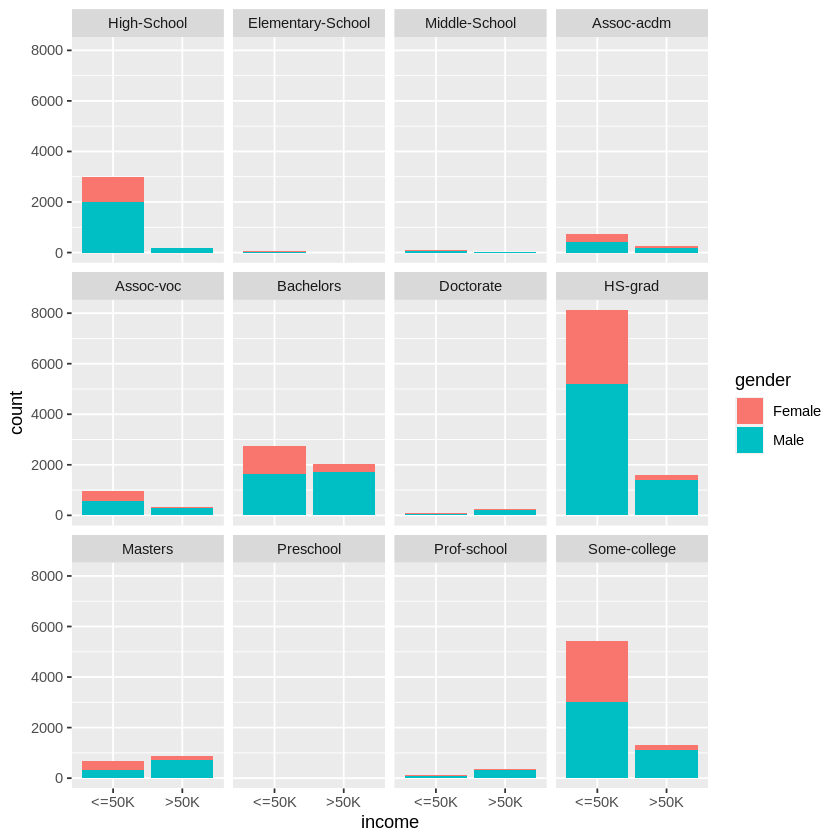

In [8]:
income_data_plot <- income_data |>
                    ggplot() +
                    geom_bar(aes(x= income, fill = gender))  +
                    facet_wrap(~education_level)
income_data_plot

**TABLE 3 - Bar charts comparing the differences in salary of male and female white collar professionals, sorted accordingly to their education levels.**